In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/data01/Tomo2Mesh/scratchpad/polymer_am_eaton/code')
from rw_utils import read_raw_data_1X, save_path
from recon import recon_slice, recon_binned
from tomo2mesh.misc import viewer
from tomo2mesh.misc.voxel_processing import cylindrical_mask, modified_autocontrast

In [2]:
projs, theta, center, dark, flat = read_raw_data_1X("89", "10")

In [3]:
center

1226.0

In [4]:
V = recon_binned(projs, theta, center, dark, flat, 4, 3.13).get()
h = modified_autocontrast(V)
V = np.clip(V, *h)
cylindrical_mask(V, 1.0, mask_val = V.min())

/data01/Tomo2Mesh/scratchpad/polymer_am_eaton/code/recon.py:91: FutureWarning: cupy.fft.cache.clear_plan_cache is experimental. The interface can change in the future.
  cp.fft.config.clear_plan_cache()


In [5]:
imgs = viewer.get_orthoplanes(vol = V)

(-0.5, 611.5, 287.5, -0.5)

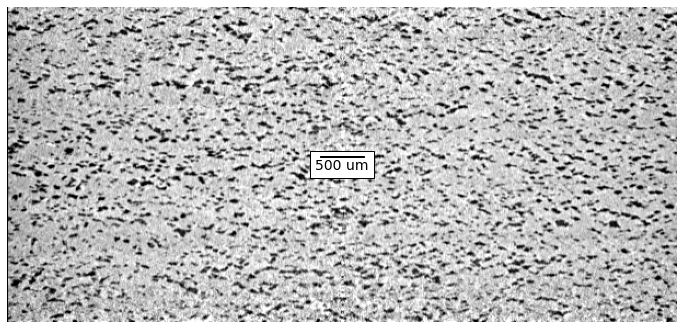

In [6]:
fig, ax = plt.subplots(1,1, figsize = (12,12))
ax.imshow(imgs[1], cmap = 'gray')
viewer.add_scalebar(ax, 500, 3.13*4, fontsize = 14, loc = 'center')
ax.axis('off')

(-0.5, 611.5, 611.5, -0.5)

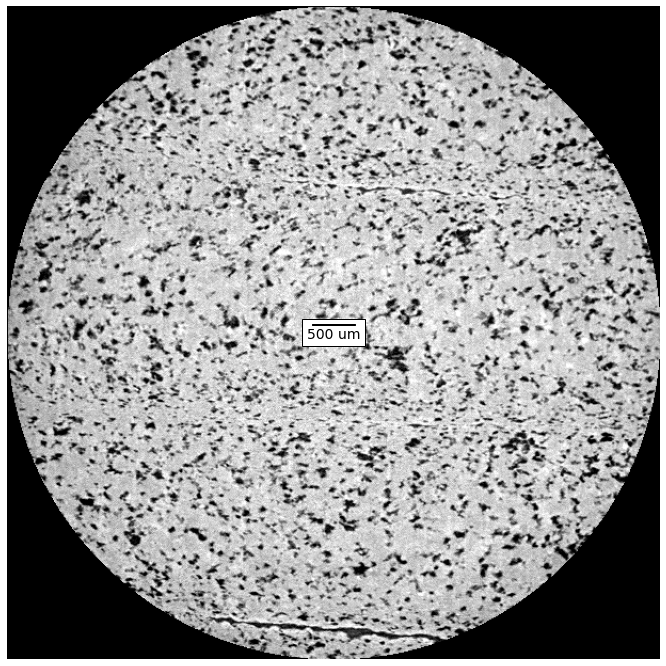

In [7]:
fig, ax = plt.subplots(1,1, figsize = (12,12))
ax.imshow(imgs[0], cmap = 'gray')
viewer.add_scalebar(ax, 500, 3.13*4, fontsize = 14, loc = 'center')
ax.axis('off')